## Homework 4: Fourier Analysis

## Due date: 

### Student Name:

**Exercise 1.**

a.- Find the Fourier series of the function $f(x) := x$ in the
interval $[-\pi,\pi]$.

b.- Use Parseval's relation to prove that 
\begin{equation*}
  \sum_{n=1}^{\infty} \frac{1}{n^2} = \pi^2/6
\end{equation*}




**Exercise 2.**

a.- Find the Fourier series of the function $f(x):= e^{sx}$ in the
interval $[-\pi, \pi]$.

b.- Use Parseval's relation to prove that 
\begin{equation*}
  \pi coth(\pi s)/s = \sum_{n=-\infty}^{\infty} \frac{1}{s^2+n^2}
\end{equation*}




**Exercise 3.**

Let $S_n: L^2 \to L^2$ be the map that sends $f \in L^2$ to the partial
Fourier series,
\begin{equation*}
  S_n(f) := \sum_{m=-n}^{n} c_m e^{imx}, \;\;\;\;\;\;\; 
                 c_m:= \frac{1}{2\pi}\langle e^{imx},f(x) \rangle.
\end{equation*}
Show that the $S_n$ are orthogonal projections and that 
$S_n S_m = S_m S_n = S_m$ if $m \leq n$.



**Exercise 4. Use of the Fourier Interpolation**

Compute the Fourier Interpolation of the functions of above (for $s= 1, 3, 3i$) and plot it along the Fourier series coefficients. Below is an example:

In [5]:
using Pkg
Pkg.instantiate()
using FFTW
using Plots

   Installed NodeJS ────────────── v2.0.0
   Installed ConcurrentUtilities ─ v2.4.2
   Installed OrderedCollections ── v1.6.3
   Installed MIMEs ─────────────── v0.1.4
   Installed Literate ──────────── v2.20.1
   Installed ExceptionUnwrapping ─ v0.1.10
   Installed LiveServer ────────── v1.4.0
   Installed Franklin ──────────── v0.10.95
   Installed FranklinTemplates ─── v0.10.2
   Installed HTTP ──────────────── v1.10.9
Precompiling project...
    701.2 ms  ✓ ExceptionUnwrapping
    806.1 ms  ✓ OrderedCollections
    872.9 ms  ✓ ConcurrentUtilities
   1356.8 ms  ✓ NodeJS
   1598.0 ms  ✓ MIMEs
   1306.8 ms  ✓ Literate
   4010.5 ms  ✓ HTTP
   1318.9 ms  ✓ LiveServer
    829.7 ms  ✓ FranklinTemplates
  16926.2 ms  ✓ Franklin
  10 dependencies successfully precompiled in 25 seconds. 48 already precompiled.


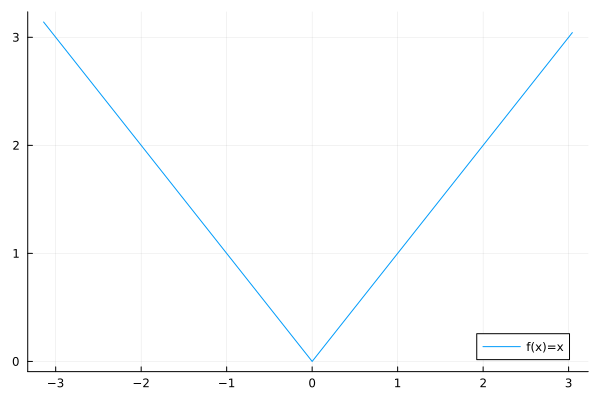

In [ ]:
N = 64
f(x) = x
f(x) = x*sign(x)
xi = -π
xf = π
xv = [xi + (xf-xi)*(i-1)/N for i in 1:N]
fv = f.(xv)
plot(xv,fv, label="f(x)=x")

The Fourier coefficients of $f(x)=x$ in the interval $[-π,π]$ are $a_n=-i(-1)^n/n$, $n\neq 0$, $a_0 = 0$.

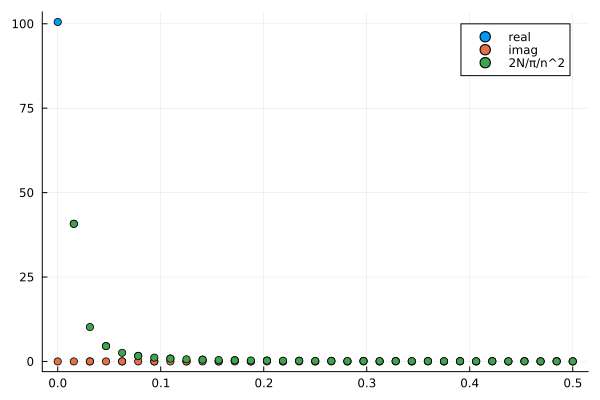

In [85]:
freq = rfftfreq(N)
rft = rfft(fv)
#fftf = fft(fv)
bn = (-1).^(freq*N) ./freq #for f(x)=x
an = 1 ./ (freq.^2)/N/π*2 #for f(x)=x*sign(x)
scatter(freq,real.(rft), label="real")
scatter!(freq,imag.(rft), label="imag")
#scatter!(freq,bn, label = "(-1)^n/n")
scatter!(freq,an, label="2N/π/n^2")
#scatter!(freq,imag.(fftf))
#scatter!(freq,real.(fftf))

We get a constant real component and not the oscillation...
For the function $f(x) = x sign(x)$ it is OK, so it seems that it only works for continuous functions. Is it that Fourier Interpolation is so different for non-continuos functions?

In [74]:
bn

33-element Vector{Float64}:
  Inf
 -64.0
  32.0
 -21.333333333333332
  16.0
 -12.8
  10.666666666666666
  -9.142857142857142
   8.0
  -7.111111111111111
   ⋮
   2.6666666666666665
  -2.56
   2.4615384615384617
  -2.3703703703703702
   2.2857142857142856
  -2.206896551724138
   2.1333333333333333
  -2.064516129032258
   2.0

In [51]:
freq

33-element Frequencies{Float64}:
 0.0
 0.015625
 0.03125
 0.046875
 0.0625
 0.078125
 0.09375
 0.109375
 0.125
 0.140625
 ⋮
 0.375
 0.390625
 0.40625
 0.421875
 0.4375
 0.453125
 0.46875
 0.484375
 0.5

In [69]:
rft

33-element Vector{ComplexF64}:
      100.53096491487338 + 0.0im
       40.77640613164179 + 3.67206751379939e-16im
   3.490016151655098e-17 + 6.62937144990061e-16im
       4.559941285845848 - 2.0485039560668363e-16im
  1.6411397263583303e-15 - 8.881784197001252e-16im
      1.6628696078575145 + 2.0713723862254145e-16im
   9.299879206764205e-16 - 3.019509372029106e-16im
      0.8650157849036777 + 1.3717786740514553e-15im
                     0.0 - 0.0im
      0.5370512420708605 + 1.3717786740514553e-15im
                         ⋮
                     0.0 + 0.0im
     0.11074358894892916 + 7.376450727363421e-16im
 -3.0195093720291053e-16 - 9.299879206764205e-16im
     0.10433462045892328 - 1.93259450814727e-16im
 -1.6411397263583303e-15 + 8.881784197001252e-16im
     0.10033496538661435 - 5.306723582074826e-16im
   -6.62937144990061e-16 + 3.4900161516551076e-17im
     0.09841171006599225 - 1.1046767693537155e-16im
                     0.0 + 0.0im

In [48]:
xv

64-element Vector{Float64}:
 -3.141592653589793
 -3.0418595534758315
 -2.94212645336187
 -2.842393353247908
 -2.7426602531339466
 -2.6429271530199845
 -2.543194052906023
 -2.443460952792061
 -2.3437278526780996
 -2.243994752564138
  ⋮
  2.3437278526781
  2.443460952792061
  2.5431940529060224
  2.6429271530199845
  2.7426602531339466
  2.8423933532479078
  2.94212645336187
  3.041859553475831
  3.141592653589793

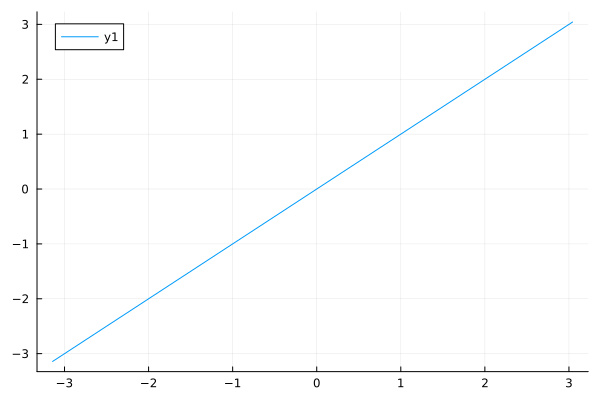

In [62]:
plot(xv,irfft(rft,N))